In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [3]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [4]:
def draw_polygon(polygon, path=""):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()
    if path != "":
        vis.save(path)
    

In [5]:
def draw_polygon_colors(polygon,colors,path=""):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()
    if path != "":
        vis.save(path)

In [46]:
#def draw_polygon_tri(polygon,tri,path=""):
#    vis = Visualizer()
#    points = polygon
#    tri_line_segments = tri
#    vis.add_polygon(points, fill=False)
#    vis.add_point(points)
#    vis.add_line_segment(tri_line_segments, color='red')
#    vis.show()
#    if path != "":
#        vis.save(path)

def draw_polygon_tri(polygon,tri,path=""):

    vis = Visualizer()
    points = polygon
    tri_line_segments = [tri[0], tri[0:len(tri)//3], tri[len(tri)//3:2 * len(tri)//3], tri[2 * len(tri)//3:]]
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.show()
    vis.save("part0" + path)
    vis.add_line_segment(tri_line_segments[0], color='red')
    vis.show()
    vis.save("part1" + path)
    vis.add_line_segment(tri_line_segments[1], color='red')
    vis.show()
    vis.save("part2" + path)
    vis.add_line_segment(tri_line_segments[2], color='red')
    vis.show()
    vis.save("part3" + path)
    vis.add_line_segment(tri_line_segments[3], color='red')
    vis.show()
    vis.save("part4" + path)
    #for tri_line in tri_line_segments:
        #print(tri_line)
        #vis.add_line_segment(tri_line_segments, color='red')
        #vis.show()
    #if path != "":
    #    vis.save(path)

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

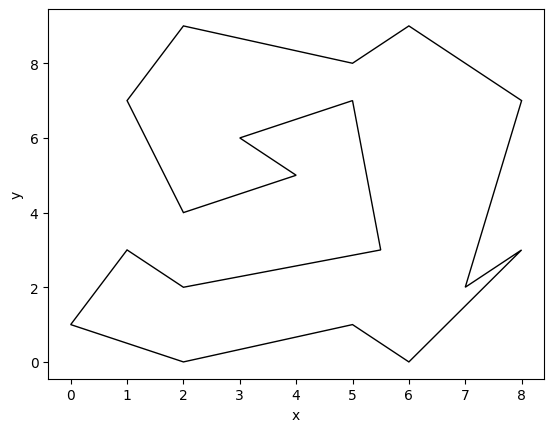

In [7]:
draw_polygon(polygon_example_2)

Do tego celu wygeneruj wielokąt.

Poniżej znajdują się funkcje, które umożliwiają "wygenerowanie" własnego wielokąta. Wystarczy kliknąć dwukrotnie lewym przyciskiem myszy w odpowiednie miejsce, a ten punkt zostanie zarejestrowany jako kolejny punkt wielokąta. Na potrzeby prawidłowego działania algorytmów punkty zadajemy w kierunku przeciwnym do ruchu wskazówek zegara. Aby zakończyć wprowadzanie wierzchołków, należy wprowadzić co najmniej trzy wierzchołki, następnie kliknąć dwukrotnie prawym przyciskiem myszy. Uwaga! Zamknięcie okna przed wprowadzeniem co najmniej 3 wierzchołków spowoduje zablokowanie działania funkcji dla "wielokąta" - nie jest to prawidłowy wielokąt.

In [8]:
%matplotlib tk

polygon=[]
events=[]
active=True

def draw_point(point):
    """
    Funkcja rysuje punkt o współrzędnych przekazanych w argumencie.
    :param point: punkt reprezentowany przez krotkę współrzędnych x, y odczytanych z kliknięcia myszki
    """
    plt.scatter(point[0],point[1],color="red")
    plt.show()

def draw_line(points):
    """
    Funkcja rysuje odcinek między dwoma wskazanymi punktami wielokąta.
    :param points: tablica punktów (krotek współrzędnych), pomiędzy którymi dodajemy krawędź
    """
    ax=plt.gca()
    x=[points[0][0],points[1][0]]
    y=[points[0][1],points[1][1]]
    line=ax.plot(x,y,color="red") 
    ax.figure.canvas.draw()        

def onclick(event):
    """
    Funkcja obsługuje zdarzenie kliknięcia myszką, dodając punkt wielokąta w kliknięte miejsce,
    a następnie dodając bok / usuwając ostatnio dodany wierzchołek
    :param event: zdarzenie kliknięcia myszką, które przechowuje m. in. informacje 
    o klikniętym punkcie oraz to, który przycisk myszy został kliknięty
    """
    global active
    if event.dblclick and active:
        if event.button==1:
            x=event.xdata
            y=event.ydata
            polygon.append((x,y))
            events.append(event)
            draw_point((x,y))
            if len(polygon)>1:
                draw_line([polygon[-2],polygon[-1]])
        elif event.button==3 and len(polygon)>2:
            draw_line([polygon[-1],polygon[0]])
            active=False
            plt.pause(0.5)
            ax.set_title("Dziękuję! Zamykam w ciągu 2 sekund")
            plt.pause(2)
            plt.close()

fig,ax=plt.subplots()
plt.get_current_fig_manager().set_window_title("Wygeneruj własny wielokąt!")
ax.set_title("Kliknij, aby dodać wierzchołek wielokąta")
connection_id=fig.canvas.mpl_connect("button_press_event",onclick)
ax.set_xlim([0,2])
ax.set_ylim([0,2])
ax.aspect=1
plt.tight_layout()
plt.ion()
plt.show()

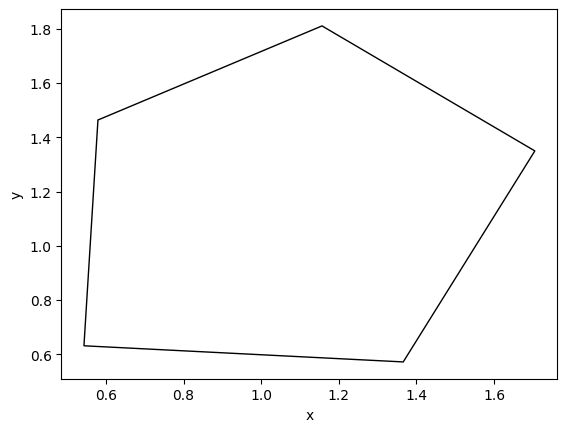

In [9]:
%matplotlib inline
if len(polygon)<3:
    print("Nieprawidłowy wielokąt - wprowadzono mniej niż 3 punkty.")
else:
    draw_polygon(polygon, "pol.png")

Poniżej znajdują się wielokąty używane do sprawdzania poprawności działania algorytmów. Uzupełniają one dostarczone automatyczne testy, zapewnione przez Koło Naukowe AGH Bit.

In [10]:
tested_polygon_one=[(1.2072123999147943,1.8801982924814096),(1.1097773378275086,1.518314513908014), 
                    (0.8824288596238423,1.1812172955108782),(0.388036137180949,0.7846323326907186), 
                    (0.0488177728770659,0.6904434040209306),(1.784605360432042,0.14018176810795915)]
tested_polygon_two=[(1.3876477000764342,1.6819058110713299),(1.0123422757402232,1.9248141007986777), 
                    (0.6406455574072448,1.7166069953180938),(0.8968636836367736,1.528229137978518), 
                    (0.4349493152229753,1.1911319195813823),(0.8355156815818161,0.8837785733957586),
                    (0.2509053090581026,0.4673643624345909),(0.6875587354492713,0.14018176810795915),
                    (1.2180385179244926,0.06086477554392719),(1.6294310022930316,0.36821812172955093),
                    (1.160299221872768,0.7152299641971906),(1.4309521721152278,1.1415587992288623),
                    (1.1061686318242758, 1.548058386119526)]
tested_polygon_three=[(0.9329507436691016,0.1798402643899751),(1.6907790043479893, 0.5417240429633708),
                      (1.748518300399714,1.503442577802258),(0.8860375656270751,1.8801982924814096),
                      (0.27616625108073223,1.3497659047094461),(0.21842695502900747,0.6805287799504267)]
tested_polygon_four=[(0.20503589910659457,0.0806940236849352),(1.5428220582154446,0.264114568989259),
                     (1.0376032177628527,0.4772789865050948),(1.676344180335058,0.7648030845497106),
                     (0.9546029796884983,0.9184797576425225),(1.6835615923415237,1.1861746075461304),
                     (0.8799505055947472,1.4101074084274302),(1.6789091182477726,1.8448141007986777),
                     (0.6164328764982593,1.9575823716432735)]
tested_polygon_five=[(0.9942987457240591,1.8603690443404017),(0.13903542295788587,0.9829248141007985),
                     (0.7525154435074616,1.2109611677223902),(0.8932549776335408,0.5912971633158908),
                     (0.5396017893167265,0.35334618562379494),(0.26173142706780106,0.5665106031396308),
                     (0.3555577831518538,0.0806940236849352),(1.5969526482639365,0.264114568989259),
                     (1.5753004122445398, 1.2803635362159183)]

Zwizualizujmy wielokąty testowe, aby wiedzieć z czym mamy do czynienia.

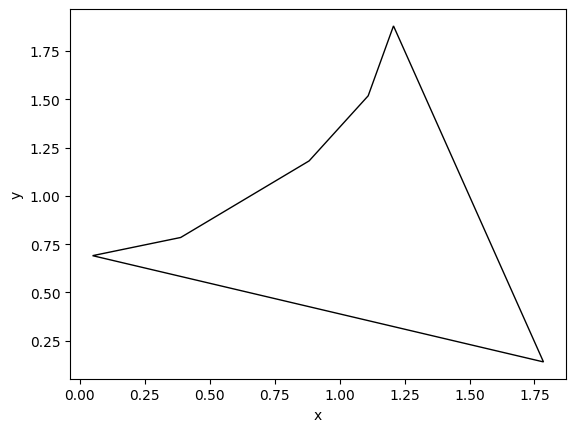

In [11]:
draw_polygon(tested_polygon_one, "pol1.png")

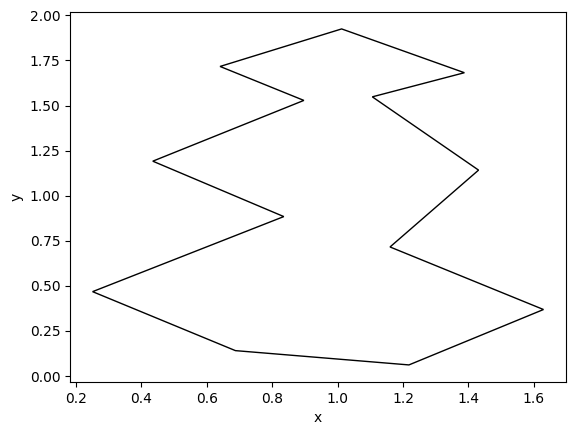

In [11]:
draw_polygon(tested_polygon_two, "pol2.png")

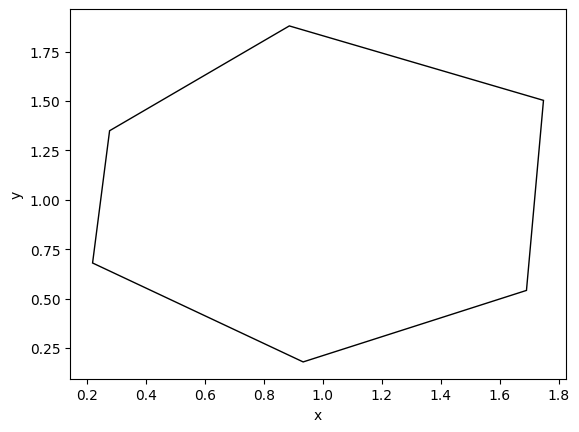

In [12]:
draw_polygon(tested_polygon_three, "pol3.png")

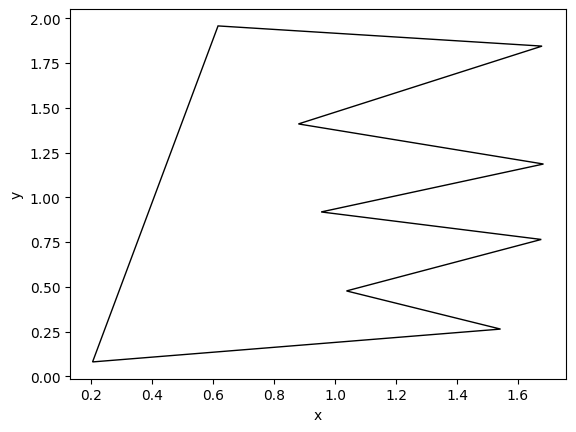

In [13]:
draw_polygon(tested_polygon_four, "pol4.png")

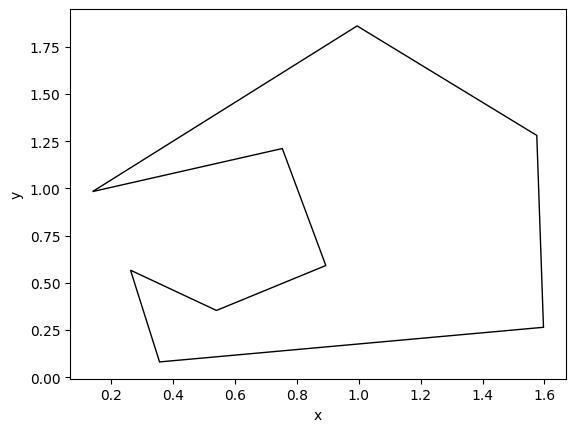

In [14]:
draw_polygon(tested_polygon_five, "pol5.png")

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [12]:
def find_extremes(polygon):
    """
    Funkcja znajduje najniższy i najwyższy wierzchołek wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej,
    podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: krotka postaci (indeks najniższego wierzchołka, indeks najwyższego wierzchołka) w danym wielokącie
    """
    n=len(polygon)
    i_min=i_max=0
    y_min=y_max=polygon[0][1]
    for i in range(1,n):
        if polygon[i][1]<y_min:
            i_min=i
            y_min=polygon[i][1]
        elif polygon[i][1]>y_max:
            i_max=i
            y_max=polygon[i][1]
    return (i_min,i_max)

In [13]:
def find_left_and_right_chain(polygon):
    """
    Funkcja dokonuje podziału na lewy i prawy łańcuch wielokąta na podstawie skrajnych punktów - najniższego i najwyższego,
    zapisując je uporządkowane po malejących współrzędnych y-owych (dla takich samych y-owych kolejność zależy od łańcucha). 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej,
    podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: krotka tablic (left_chain,right_chain), oznaczająco odpowiednio lewy i prawy łańcuch wielokąta
    """
    # vertex at index 0 doesn't always have to be the one with biggest y position
    # so adjust left and right chain to any index of top and lowest vertexes
    n=len(polygon)
    left_chain=[]
    right_chain=[]
    i_min,i_max=find_extremes(polygon)
    if i_min<i_max:
        for i in range(i_max-1,i_min-1,-1):
            right_chain.append((polygon[i],i))
        for i in range(i_max,n):
            left_chain.append((polygon[i],i))
        for i in range(i_min):
            left_chain.append((polygon[i],i))
    else:
        for i in range(i_max,i_min):
            left_chain.append((polygon[i],i))
        for i in range(i_max-1,-1,-1):
            right_chain.append((polygon[i],i))
        for i in range(n-1,i_min-1,-1):
            right_chain.append((polygon[i],i))
    return left_chain,right_chain

In [14]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej,
    podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false, jeśli nie jest
    """
    # Get left and right chain, check if polygon is y-monotonic
    # Both chains start from the one with the biggest y
    left_chain,right_chain=find_left_and_right_chain(polygon)
    l=len(left_chain)
    r=len(right_chain)
    for i in range(l-1):
        if left_chain[i][0][1]<left_chain[i+1][0][1]:
            return False
    for i in range(r-1):
        if right_chain[i][0][1]<right_chain[i+1][0][1]:
            return False
    return True

Przeprowadź test poprawności powyższej funkcji.

In [15]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.008s


Sprawdź monotoniczność swojego wielokątu.

In [19]:
print(is_y_monotonic(polygon))

True


In [20]:
print(is_y_monotonic(tested_polygon_one))

True


In [21]:
print(is_y_monotonic(tested_polygon_two))

True


In [22]:
print(is_y_monotonic(tested_polygon_three))

True


In [23]:
print(is_y_monotonic(tested_polygon_four))

True


In [24]:
print(is_y_monotonic(tested_polygon_five))

False


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

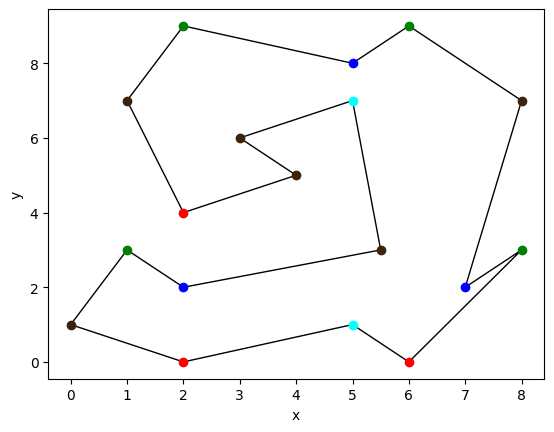

In [25]:
draw_polygon_colors(polygon_example_2,polygon_example_colors, "cepol.png")

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [16]:
def orient(a,b,c):
    """
    Funkcja sprawdza, czy punkty a,b,c tworzą lewo- czy prawostronny skręt, obliczając wyznacznik odpowiedniej macierzy
    :param a: krotka współrzędnych (x, y) pierwszego punktu
    :param b: krotka współrzędnych (x, y) punktu, dla którego badamy rodzaj skrętu
    :param c: krotka współrzędnych (x, y) ostatniego punktu w układzie
    :return: wartość odpowiedniego wyznacznika macierzy, dodatnia jeżeli skręt jest lewostronny,
    ujemna jeżeli skręt jest prawostronny, w przeciwnym razie równa zero (punkty współliniowe)
    """
    return a[0]*c[1]+a[1]*b[0]+c[0]*b[1]-c[1]*b[0]-a[0]*b[1]-a[1]*c[0]

In [17]:
def classify_color(pn, p, nn):
    if pn[1]<p[1] and nn[1] < p[1]:
        if orient(pn, p, nn) < 0:
            return 0
        else:
            return 3
    elif pn[1] > p[1] and nn[1] > p[1]:
        if orient(pn, p, nn) < 0:
            return 1
        else:
            return 2
    else:
        return 4    

In [18]:
def color_vertex(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    sol = [-1] * n
    # get color of first vertex and last
    sol[0] = classify_color(polygon[-1], polygon[0], polygon[1])
    sol[-1] = classify_color(polygon[-2], polygon[-1], polygon[0])
    for i in range(1, n - 1):
        sol[i] = classify_color(polygon[i-1], polygon[i], polygon[i+1])
        
    return sol

Przeprowadź test poprawności powyższej funkcji. 

In [29]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.002s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

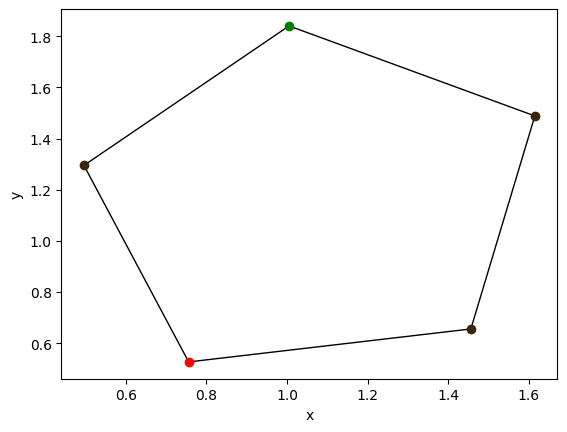

In [30]:
if len(polygon)<3:
    print("Nieprawidłowy wielokąt - wprowadzono mniej niż 3 punkty.")
else:
    colors=color_vertex(polygon)
    draw_polygon_colors(polygon,colors,"cpol.png")

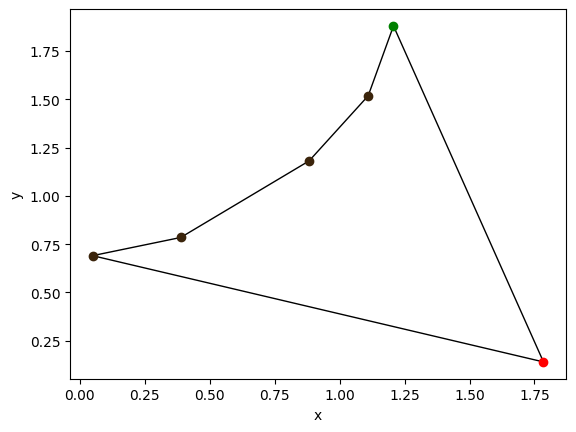

In [31]:
colors=color_vertex(tested_polygon_one)
draw_polygon_colors(tested_polygon_one,colors, "cpol1.png")

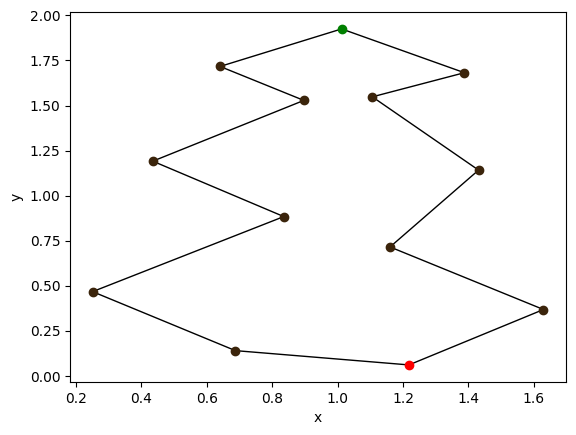

In [32]:
colors=color_vertex(tested_polygon_two)
draw_polygon_colors(tested_polygon_two,colors, "cpol2.png")

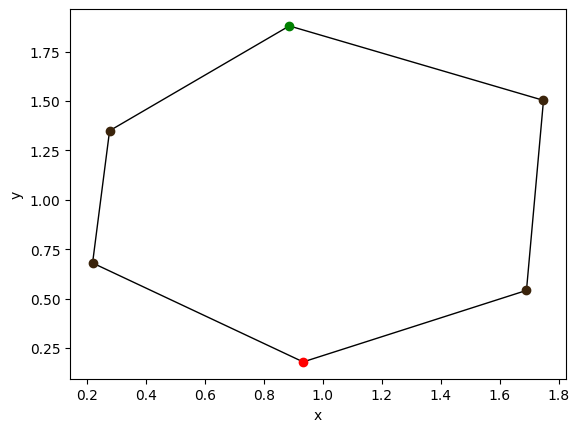

In [33]:
colors=color_vertex(tested_polygon_three)
draw_polygon_colors(tested_polygon_three,colors, "cpol3.png")

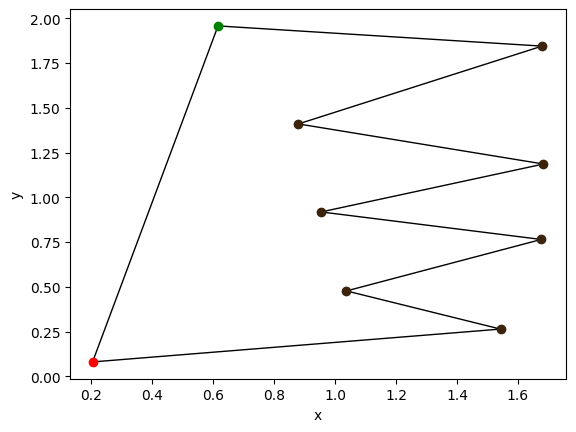

In [34]:
colors=color_vertex(tested_polygon_four)
draw_polygon_colors(tested_polygon_four,colors, "cpol4.png")

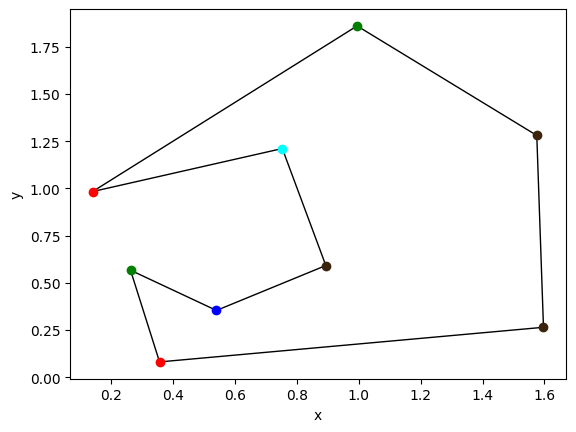

In [35]:
colors=color_vertex(tested_polygon_five)
draw_polygon_colors(tested_polygon_five,colors, "cpol5.png")

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

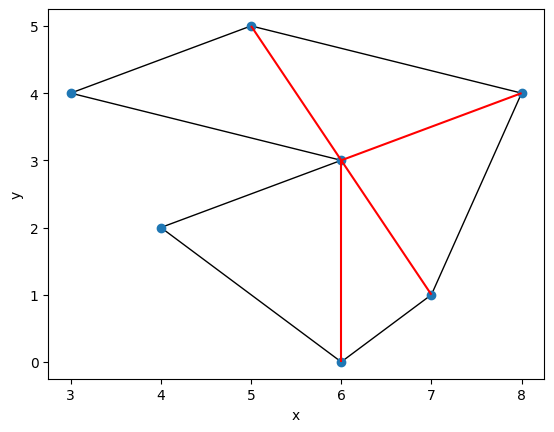

In [36]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [19]:
def triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego zgodnie z algorytmem opisanym na wykładzie. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej,
    podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych, np: [(1,5),(2,3)] oznacza, że 
    triangulacja polega na dodaniu przekątnych pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    n = len(polygon)
    left_chain, right_chain = find_left_and_right_chain(polygon)
    monotonic_order = [None for _ in range(n)]
    l = len(left_chain)
    r = len(right_chain)
    i = j = 0
    # Monotonic order is sorting vertexes with respect to their y value. There is no particular order between left and right chain
    while i < l and j < r:
        if left_chain[i][0][1] > right_chain[j][0][1]:
            monotonic_order[i+j] = (left_chain[i][0],left_chain[i][1],'l')
            i += 1
        else:
            monotonic_order[i+j] = (right_chain[j][0], right_chain[j][1], 'r')
            j += 1
    while i < l:
        monotonic_order[i+j] = (left_chain[i][0], left_chain[i][1], 'l')
        i += 1
    while j < r:
        monotonic_order[i+j] = (right_chain[j][0], right_chain[j][1], 'r')
        j += 1    

    # Add first two vertexes to stack
    stack = [monotonic_order[0], monotonic_order[1]]
    diagonals = []
    for i in range(2,n):
        current = monotonic_order[i]
        # If current vertex is from different chain than vertex from top of the stack
        # Then we create diagonals, from all vertexes on stack to current vertex
        if current[2] != stack[-1][2]:
            for j in range(len(stack)-1, -1, -1):
                # Opisać, czemu to działa :) 
                if abs(current[1] - stack[j][1]) not in (1, n-1):
                    diagonals.append((current[1],stack[j][1]))
            stack=[stack[-1]]
        else:
            last=len(stack)-1
            for j in range(len(stack)-2, -1, -1):
                # If we have correct triangle we want to 
                if correct_triangle(stack[j],stack[last],current,n):
                    diagonals.append((current[1],stack[j][1]))
                    for _ in range(len(stack)-1,last-1,-1):
                        stack.pop()
                    last=j
        stack.append(current)
    return diagonals

In [20]:
def correct_triangle(stack_point_one,stack_point_two,current_point,n):
    """
    Funkcja sprawdza, czy dane trzy punkty tworzą prawidłowy trójkąt w triangulacji. 
    :param stack_point_one: odpowiedni wierzchołek ze stosu, który potencjalnie może tworzyć trójkąt
    :param stack_point_two: "ostatni" wierzchołek ze stosu (niekoniecznie ze szczytu),
    który zostanie z niego usunięty, jeżeli trójkąt jest prawidłowy
    :param current_point: aktualnie badany punkt w wyznaczaniu triangulacji,
    który pochodzi z innego łańcucha niż punkt ze szczytu stosu
    :param n: liczba wierzchołków wielokąta, dla którego wyznaczamy triangulację
    :return: wartość bool - true, jeżeli trójkąt jest prawidłowy (punkty w kolejności przeciwnie do wskazówek zegara tworzą
    "prawostronny" skręt i potencjalna przekątna nie jest bokiem wielokąta) lub false, jeśli nie
    """
    if abs(current_point[1]-stack_point_one[1]) in (1,n-1): return False
    if current_point[2]=='r':
        return orient(current_point[0],stack_point_two[0],stack_point_one[0])<0
    else:
        return orient(stack_point_one[0],stack_point_two[0],current_point[0])<0

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [48]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.009s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

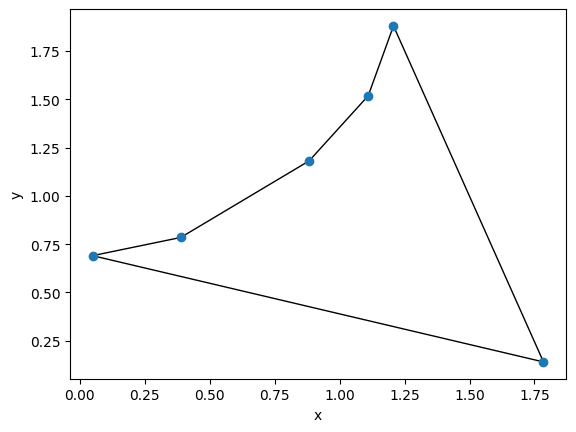

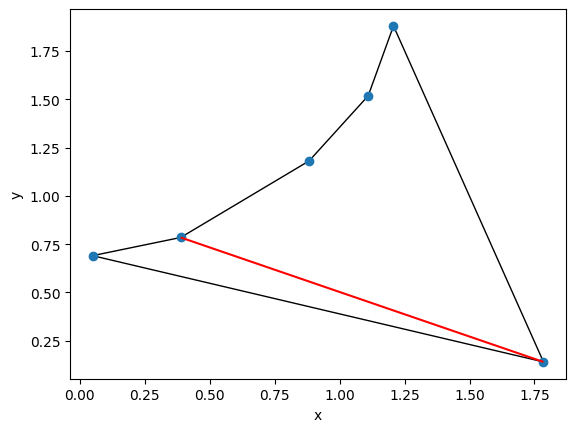

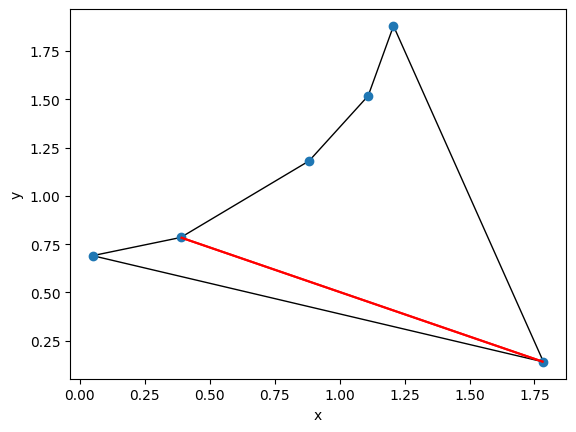

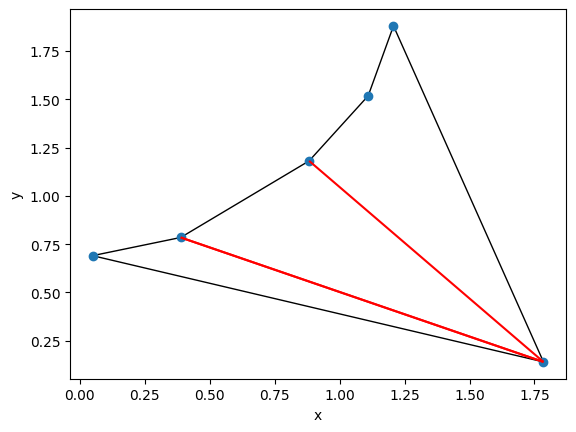

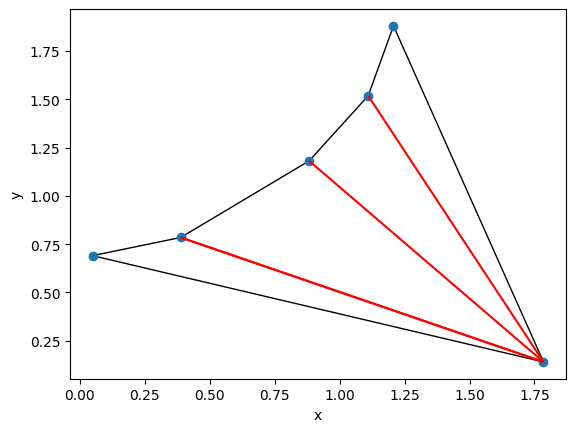

In [47]:
tri = triangulation(tested_polygon_one)
draw_polygon_tri(tested_polygon_one, [(tested_polygon_one[x], tested_polygon_one[y]) for (x, y) in tri], "tpol1.png")

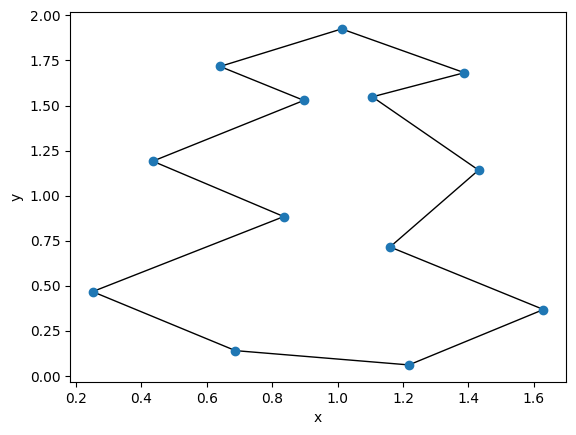

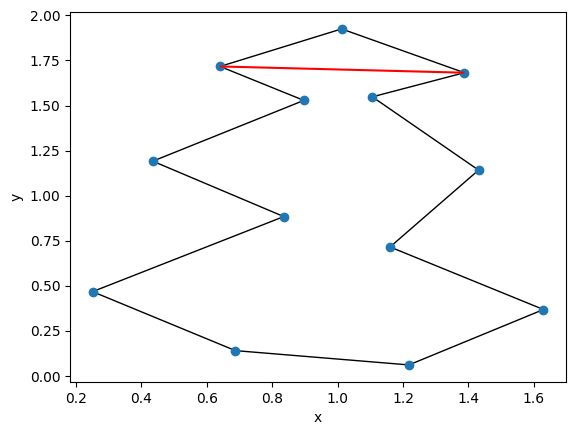

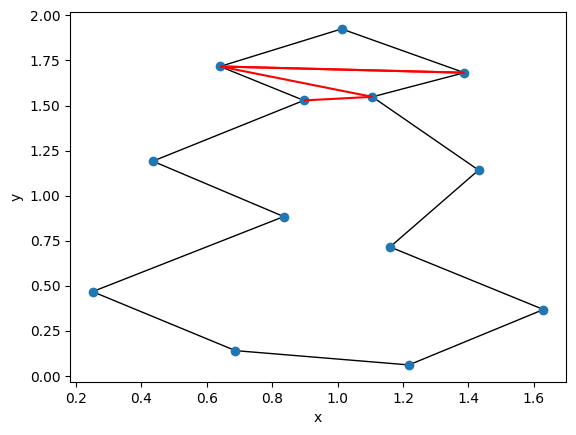

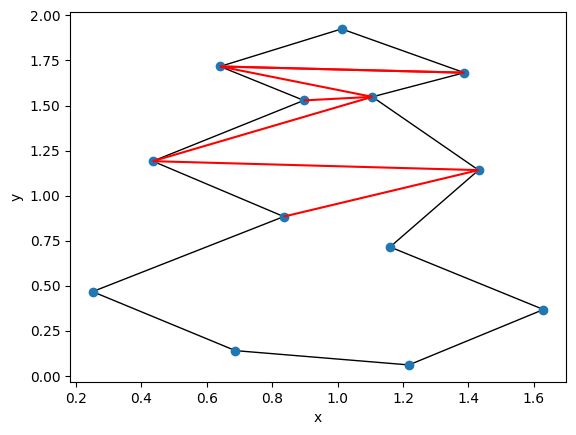

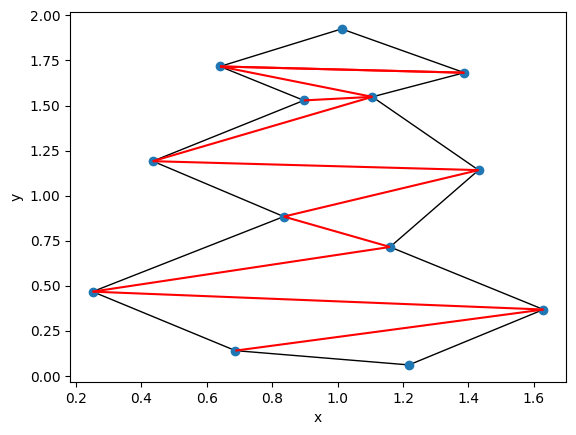

In [48]:
tri = triangulation(tested_polygon_two)
draw_polygon_tri(tested_polygon_two, [(tested_polygon_two[x], tested_polygon_two[y]) for (x, y) in tri], "tpol2.png")

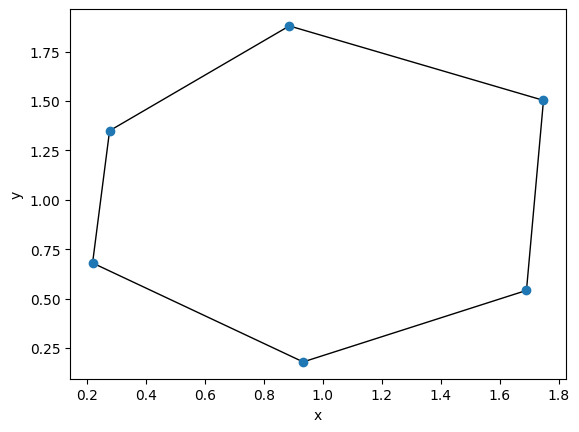

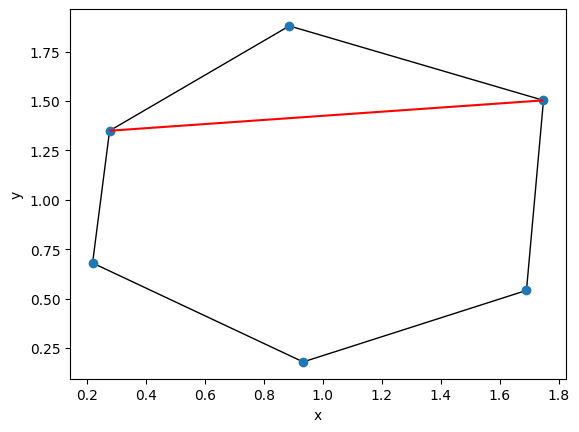

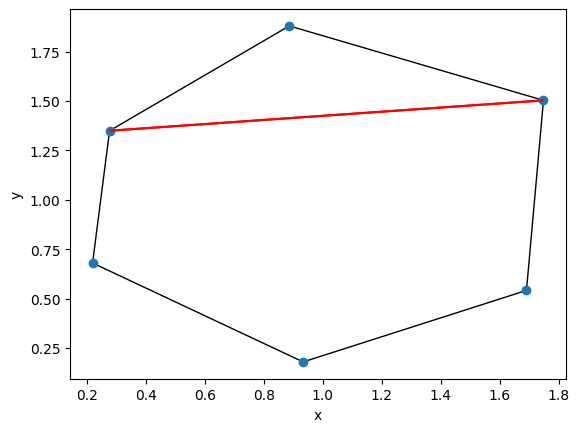

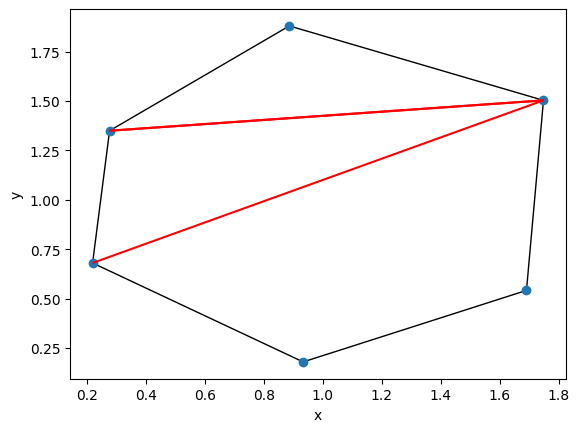

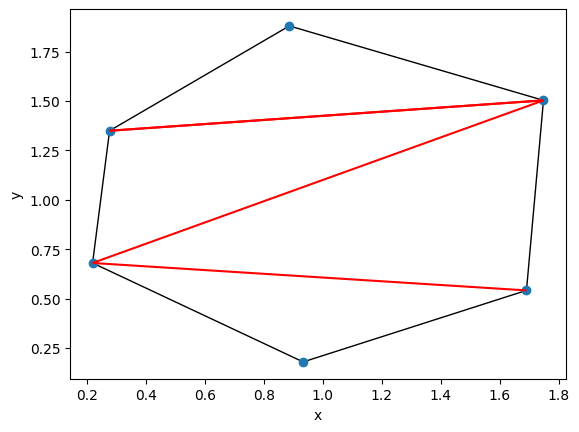

In [49]:
tri = triangulation(tested_polygon_three)
draw_polygon_tri(tested_polygon_three, [(tested_polygon_three[x], tested_polygon_three[y]) for (x, y) in tri], "tpol3.png")

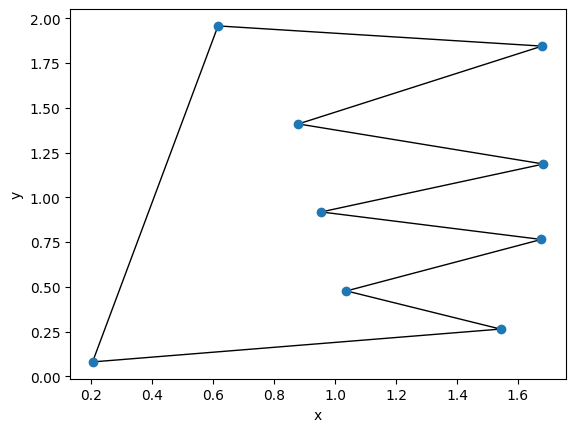

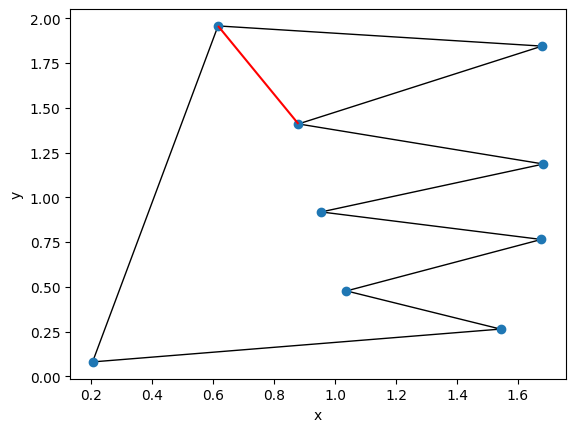

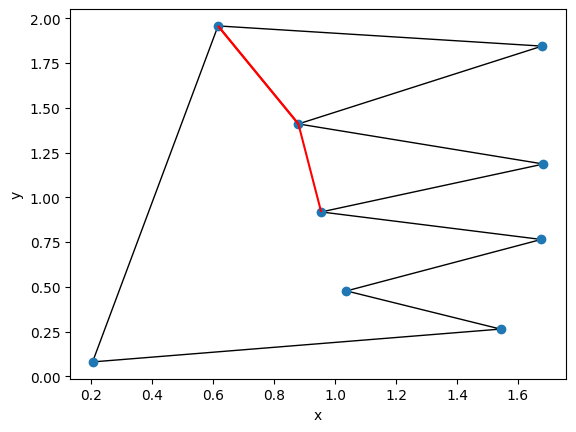

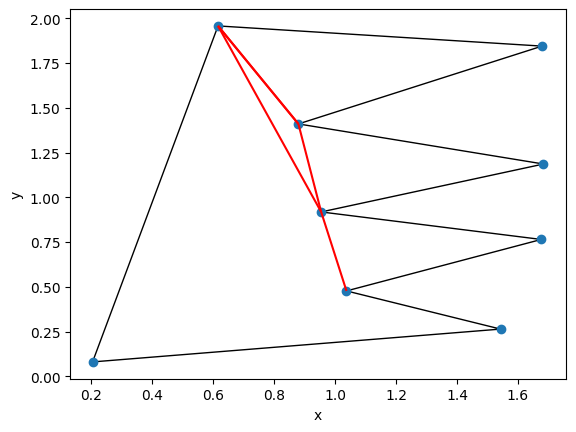

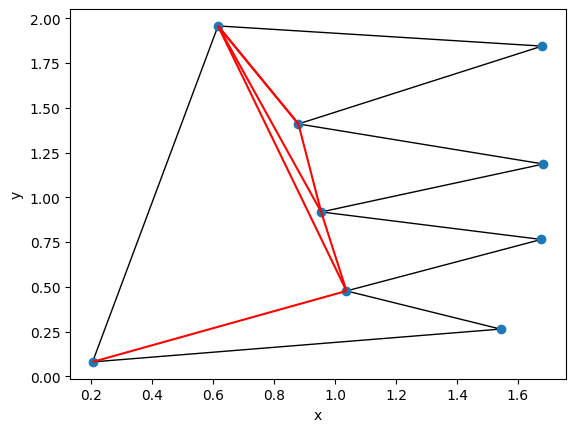

In [50]:
tri = triangulation(tested_polygon_four)
draw_polygon_tri(tested_polygon_four, [(tested_polygon_four[x], tested_polygon_four[y]) for (x, y) in tri], "tpol4.png")